# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as nplinalg
%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
#1)Przekształcenie
res=[]
time=[]
mem=[]
m=50
n=12
A,b=main.spare_matrix_Abt(m,n) 
A_new,b_new=main.square_from_rectan(A,b) 
result = np.linalg.solve(A_new,b_new)
res_1 = main.residual_norm(A_new,result,b_new)
res.append(res_1)
print("Norma residuum wynosi:",res_1)

time_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A_new,b_new)
time.append(time_1.average)

mem_1 = %memit -o np.linalg.solve(A_new,b_new)
mem.append(mem_1.mem_usage)

Norma residuum wynosi: 3.1445781031714547e-14
38.3 µs ± 6.71 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 113.18 MiB, increment: 0.78 MiB


In [3]:
#2)Metoda lstsq
A,b = main.spare_matrix_Abt(m,n)
result = sp.linalg.lstsq(A,b)[0]
res_2 = (main.residual_norm(A,result,b))
res.append(res_2)
print("Norma residuum wynosi:",res_2)

time_2 = %timeit -r 5 -n 10 -o sp.linalg.lstsq(A,b)[0]
time.append(time_2.average)

mem_2 = %memit -o sp.linalg.lstsq(A,b)[0]
mem.append(mem_2.mem_usage)

Norma residuum wynosi: 7.999155468575555e-09
354 µs ± 169 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 113.49 MiB, increment: 0.00 MiB


In [4]:
#3)Metoda qr
A,b = main.spare_matrix_Abt(m,n)
q,r = np.linalg.qr(A)
result = sp.linalg.solve_triangular(r, q.T @ b)
res_3 = main.residual_norm(r, result, q.T @ b)
res.append(res_3)
print("Norma residuum wynosi:",res_3)

time_31 = %timeit -r 5 -n 10 -o np.linalg.qr(A)
time_32 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(r, q.T @ b)
time.append(time_31.average + time_32.average)

q,r = np.linalg.qr(A)
mem_3 = %memit -o sp.linalg.solve_triangular(r, q.T @ b)
mem.append(mem_3.mem_usage)

Norma residuum wynosi: 1.5859737849776556e-15
92.8 µs ± 10.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
42.9 µs ± 3.98 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 113.69 MiB, increment: 0.02 MiB


In [5]:
#4)Metoda svd
A,b = main.spare_matrix_Abt(m,n)
[U,s,V] = np.linalg.svd(A, full_matrices= False)
S = np.diag(s)
c = V.T @ np.linalg.solve(S,U.T @ b)
res_4 = main.residual_norm(A,c,b)
res.append(res_4)
print("Norma residuum wynosi:",res_4)

time_41 = %timeit -r 5 -n 10 -o np.linalg.svd(A, full_matrices= False)
time_42 = %timeit -r 5 -n 10 -o np.diag(s)
time_43 = %timeit -r 5 -n 10 -o V.T @ np.linalg.solve(S,U.T @ b)
time.append(time_41.average + time_42.average + time_43.average)

[U,s,V] = np.linalg.svd(A, full_matrices= False)
S = np.diag(s)
mem_4 = %memit -o V.T @ np.linalg.solve(S,U.T @ b)
mem.append(mem_4.mem_usage)

Norma residuum wynosi: 7.999154304339426e-09
202 µs ± 25.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
8.93 µs ± 1.44 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
64 µs ± 29.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 113.85 MiB, increment: 0.00 MiB


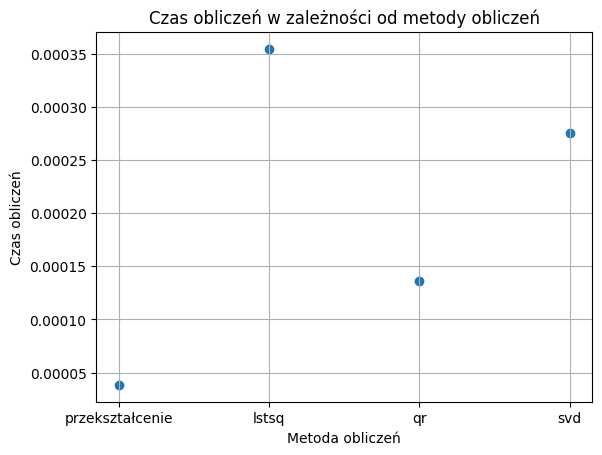

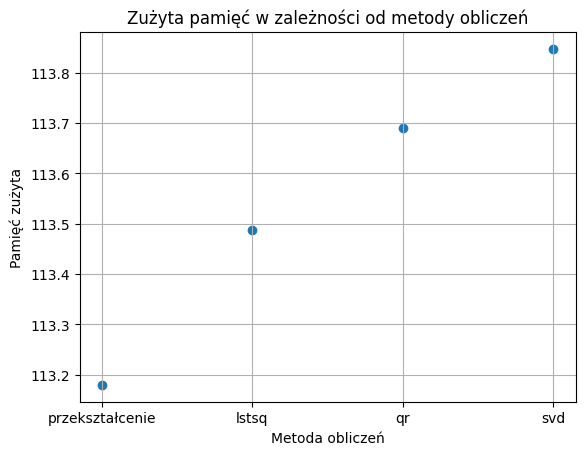

In [6]:
#5)Porównanie
method = ["przekształcenie", "lstsq", "qr", "svd"]

plt.scatter(method ,time)
plt.title("Czas obliczeń w zależności od metody obliczeń")
plt.xlabel("Metoda obliczeń")
plt.ylabel("Czas obliczeń")
plt.grid()
plt.show()


plt.scatter(method,mem)
plt.title("Zużyta pamięć w zależności od metody obliczeń")
plt.xlabel("Metoda obliczeń")
plt.ylabel("Pamięć zużyta")
plt.grid()
plt.show()

Najlepiej pod względem dokładności i czasu wykonywania wypadła pierwsza metoda (przekształcenie macierzy do macierzy kwadratowej), ale zużywa ona najwięcej pamięci. Najmniej pamięci zużywa metoda svd, a jej czas wykonywania jest na 3 miejscu z 5.

***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


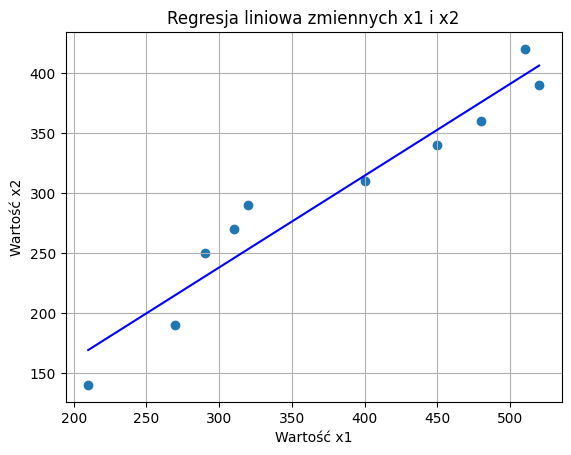

In [8]:
x1=np.array([210,270,290,310,320,400,450,480,510,520])
x2=np.array([140,190,250,270,290,310,340,360,420,390])

z,cov = np.polyfit(x1, x2,1,cov=True)
poly=np.poly1d(z)

plt.scatter(x1,x2)
plt.plot(x1,poly(x1) , "b")
plt.grid()
plt.title("Regresja liniowa zmiennych x1 i x2")
plt.xlabel("Wartość x1")
plt.ylabel("Wartość x2")
plt.show()

Uzyskany błąd prostej względem danych nie jest duży, można uzyskać lepszy wynik badając funkcję na większej ilości danych.

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

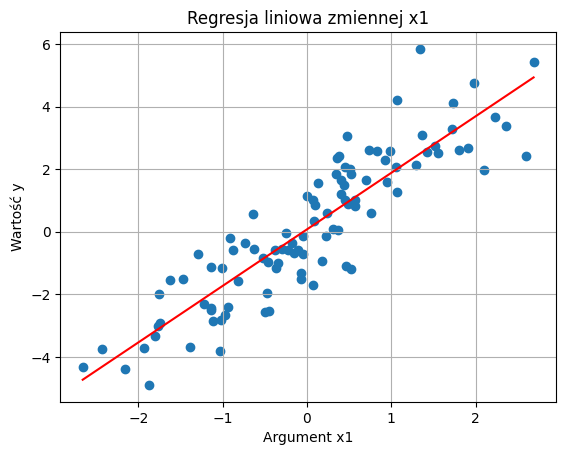

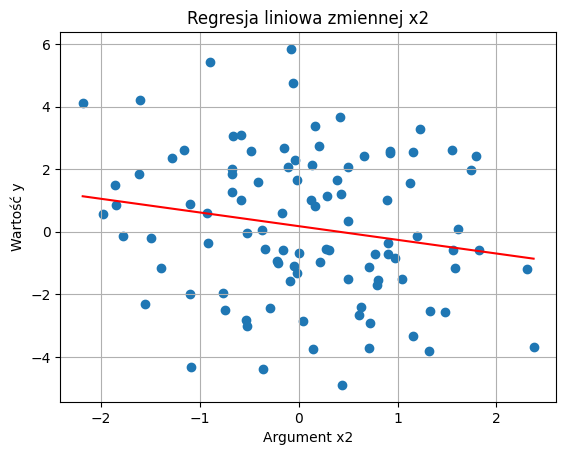

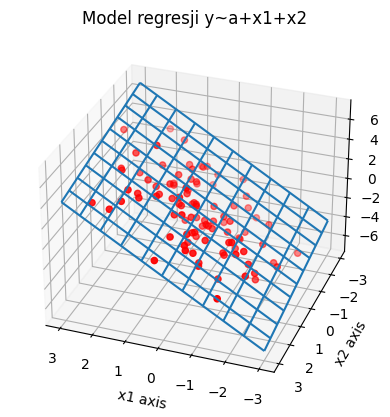

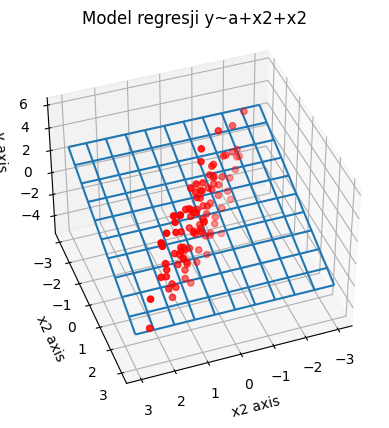

In [9]:
#1)Wygenerowanie wektorów x1 i x2
x1=np.random.normal(0,1,size=(100,1))
x2=np.random.normal(0,1,size=(100,1))

#2)Wyliczenie wartości y
epsilon=np.random.normal(0,1,(100,1))
y=2*x1-0.5*x2+epsilon

#3)Połączenie wektorów samych jedynek z x1, x2, x1 i x2 za pomocą fynkcji concatenate 
ones=np.ones((100,1))
x_con1=np.concatenate((ones,x1),axis=1)
x_con2=np.concatenate((ones,x2),axis=1)
x_con12=np.concatenate((ones,x1,x2),axis=1)

#4)Obliczenie współczynników regresji liniowych z wykorzystaniem rozkładu QR
pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

#a)y~a+x1
Q,R=np.linalg.qr(x_con1)
alfa= sp.linalg.solve_triangular(R,Q.T @ y)

y_t=alfa[0]+alfa[1]*pred1

plt.scatter(x1,y)
plt.plot(pred1,y_t, "r")
plt.grid()
plt.title("Regresja liniowa zmiennej x1")
plt.xlabel("Argument x1")
plt.ylabel("Wartość y")
plt.show()

#b)y~a+x2
Q,R=np.linalg.qr(x_con2)
alfa=sp.linalg.solve_triangular(R,Q.T @ y)
y_t=alfa[0]+alfa[1]*pred2

plt.scatter(x2,y)
plt.plot(pred2,y_t, "r")
plt.grid()
plt.title("Regresja liniowa zmiennej x2")
plt.xlabel("Argument x2")
plt.ylabel("Wartość y")
plt.show()

#c)y~a+x1+x2
Q,R=np.linalg.qr(x_con12)
alfa=sp.linalg.solve_triangular(R,Q.T @ y)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
X=x1
Y=x2
Z=y

ax.scatter(X,Y,Z,c='r',marker="o")
ax.set_xlabel("x1 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y~a+x1+x2")

X,Y=np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z=alfa[0]+alfa[1]*X+alfa[2]*Y
ax.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
ax.view_init(30,110)

plt.show()

#d)y~a+x2+x2
Q,R=np.linalg.qr(x_con2)
alfa=sp.linalg.solve_triangular(R,Q.T @ y)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
X=x2
Y=x2
Z=y

ax.scatter(X,Y,Z,c='r',marker="o")
ax.set_xlabel("x2 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y~a+x2+x2")

X,Y=np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
Z=alfa[0]+alfa[1]*Y+alfa[1]*Y
ax.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
ax.view_init(40,70)

plt.show()



***Wnioski***

Podczas tych ćwiczeń zapoznałam się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Do wykonania zadań użyłam domyślnej metody Pythona do rozwiązywania układów równań z macierzą prostokątną-'lstsq', rozkładu QR rozwiązywania układó równań-'qr'. Funkcja 'qr' wykazała się największą dokładnością, ale czas wykonywania obliczeń był większy niż w przypadku zastosowania funkcji 'solve'. Do rozwiązania układu równań z macierzą trójkątną wykorzystałam funkcję 'solve_triangular'. Podczas tych ćwiczeń skorzystałam także z funkcji 'random.normal' i 'concatenate'.


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)